In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from IPython.display import Image
import itertools
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
plt.show()

# Dataset

Cada columna representa un regundo de actividad cerebral del paciente y cada fila representa un paciente diferente.
La columna "y" es la categoria a la cual pertenece el paciente:

    5 - Ojos abiertos, significa que cuando estaban grabando la señal de EEG del cerebro, el paciente tenía los ojos abiertos.
    4 - Ojor cerrados, significa que cuando estaban grabando la señal de EEG del cerebro, el paciente tenía los ojos cerrados.
    3 - Identificaron dónde estaba la región del tumor en el cerebro y registraron la actividad del EEG del área sana del cerebro.
    2 - Registraron el EEG del área donde se localizó el tumor.
    1 - Grabación de ataques.

Los pacientes en la categoría 1, son los que padecen de ataques de epilepsia; mientras que los de las categorías de la 2 a la 5, no. 


In [53]:
data = pd.read_csv("Data/data.csv")

In [54]:
data.head()

Unnamed: 0   X1   X2   X3   X4   X5   X6   X7   X8   X9 ...  X170  X171  \
0  X21.V1.791  135  190  229  223  192  125   55   -9  -33 ...   -17   -15   
1  X15.V1.924  386  382  356  331  320  315  307  272  244 ...   164   150   
2     X8.V1.1  -32  -39  -47  -37  -32  -36  -57  -73  -85 ...    57    64   
3   X16.V1.60 -105 -101  -96  -92  -89  -95 -102 -100  -87 ...   -82   -81   
4   X20.V1.54   -9  -65  -98 -102  -78  -48  -16    0  -21 ...     4     2   

   X172  X173  X174  X175  X176  X177  X178  y  
0   -31   -77  -103  -127  -116   -83   -51  4  
1   146   152   157   156   154   143   129  1  
2    48    19   -12   -30   -35   -35   -36  5  
3   -80   -77   -85   -77   -72   -69   -65  5  
4   -12   -32   -41   -65   -83   -89   -73  5  

[5 rows x 180 columns]

A continuación se muestra el dataset modificado, donde se eliminó la primera columna, correspondiente a la identificación del paciente. 

Se pueden visualizar las primeras 5 filas del dataset

In [56]:
del data["Unnamed: 0"]
data.head()

X1   X2   X3   X4   X5   X6   X7   X8   X9  X10 ...  X170  X171  X172  \
0  135  190  229  223  192  125   55   -9  -33  -38 ...   -17   -15   -31   
1  386  382  356  331  320  315  307  272  244  232 ...   164   150   146   
2  -32  -39  -47  -37  -32  -36  -57  -73  -85  -94 ...    57    64    48   
3 -105 -101  -96  -92  -89  -95 -102 -100  -87  -79 ...   -82   -81   -80   
4   -9  -65  -98 -102  -78  -48  -16    0  -21  -59 ...     4     2   -12   

   X173  X174  X175  X176  X177  X178  y  
0   -77  -103  -127  -116   -83   -51  4  
1   152   157   156   154   143   129  1  
2    19   -12   -30   -35   -35   -36  5  
3   -77   -85   -77   -72   -69   -65  5  
4   -32   -41   -65   -83   -89   -73  5  

[5 rows x 179 columns]

Dentro del proceso de conocer el dataset y limpiarlo, se verificó la existencia de valores nulos.
Además no hubo necesidad de realizar one hot encoding porque todos los datos son numéricos.

In [58]:
np.sum(np.sum(data.isna()))

0

# Matriz de Confusión

Se utiliza para evaluar la calidad de la salida de un clasificador en el conjunto de datos. 
Los elementos de la diagonal representan el número de puntos para los cuales la etiqueta predicha es igual a la etiqueta verdadera, mientras que los elementos fuera de la diagonal son aquellos que están clasificados incorrectamente por el clasificador. Los valores más altos de esta matriz indican que se tienen ese numero de predicciones correctas. 

In [60]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Método para curvas de aprendizaje

In [62]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim != None:
        plt.ylim(*ylim)
    plt.xlabel("Training samples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Train score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Test score")

    plt.legend(loc="best")
    return plt

A continuación, se tienen $X$ y $y$, las variables utilizadas a lo largo del desarrollo de la predicción.

In [64]:
X = data
y = data["y"]

In [65]:
#Regresión logística
#En la implementación del algoritmo, se utiliza lbfgs como solver porque soporta multiclase, y multinomial por la misma razón.
#Como se puede observar el accuracy de LR es muy baja, debido a que la complejidad del modelo es muy simple 
#para este tipo de clasificación.
#En la curva de aprendizaje puede observarse que al principio hay un overfitting, pero comienza a desaparecer a medida
#que se añaden datos de training.

## Regresión Logística

En la implementación del algoritmo, se utiliza lbfgs como solver porque soporta multiclase, y multinomial por la misma razón.

In [66]:
def logisticRegression(X, y):
    Xtr, Xts, ytr, yts = train_test_split(X,y,test_size=0.3)
    clf = LogisticRegression(solver='lbfgs', multi_class='multinomial')
    clf.fit(Xtr, ytr)
    predicts = clf.predict(Xts)
    acc = clf.score(Xts, yts)
    print "Logistic regression reports:\n", classification_report(yts, predicts)
    print "Logistic regression accuracy:", acc
    return confusion_matrix(yts, predicts), clf

#### Matriz de confusión y reportes
Como se puede observar el accuracy de LR es muy baja, debido a que la complejidad del modelo es muy simple para este tipo de clasificación.


Logistic regression reports:
             precision    recall  f1-score   support

          1       0.69      0.31      0.43       677
          2       0.17      0.03      0.06       678
          3       0.08      0.02      0.03       726
          4       0.20      0.27      0.23       641
          5       0.28      0.76      0.41       728

avg / total       0.28      0.28      0.23      3450

Logistic regression accuracy: 0.28231884057971013


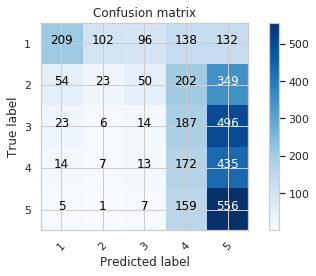

In [68]:
conf_matrix, clf = logisticRegression(X, y)
plt.figure()
plot_confusion_matrix(conf_matrix, classes=['1', '2', '3', '4', '5'], title='Confusion matrix')
plt.show()

#### Curva de aprendizaje
En la curva de aprendizaje puede observarse que al principio hay un overfitting, pero comienza a desaparecer a medida que se añaden datos de training.

<module 'matplotlib.pyplot' from '/opt/miniconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

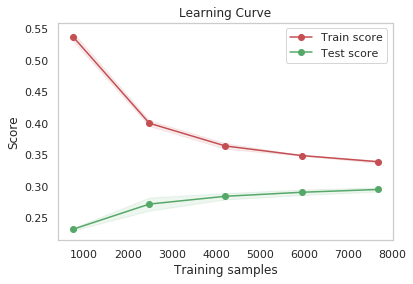

In [70]:
plot_learning_curve(clf, "Learning Curve", X, y)

In [71]:
#SVM
#The multiclass support is handled according to a one-vs-one scheme.
#Debido a que la complejidad de SVM en training es más que cuadrática se hace complicado aplicarlo para este dataset debido
#al tamaño de este. Por esto mismo es dificil realizar validación de parámetros, debido al tiempo de ejecución.
#Se probó con un polinomio de grado 3 y 5, pero el que mejor resultados arrojo fue de grado 2, se intentó variar
#parametros pero toma mucho tiempo para la ejecución.
#Debido a lo anterior se decidió probar con 5000 datos del data set para ver cómo se comportaba el algoritmo (ver imágenes)
#En la curva de aprendizaje se puede apreciar un overfitting, y a pesar de que disminuye a medida que se agregan datos de 
#train, aún así es muy grande.
#El tipo de kernel elegido fue el polinomial por el tipo de tarea de clasificación, de grado 2 porque fue le que mejor
#accuracy arrojó y el valor de gamma se decidió dejarlo auto lo que significa que es calculado como: 1 / n_features

## SVM

El soporte multiclase se maneja de acuerdo con un esquema de one-vs-one.

Debido a que la complejidad de SVM en training es más que cuadrática se hace complicado aplicarlo para este dataset debido al tamaño de este. Por esto mismo es dificil realizar validación de parámetros, debido al tiempo de ejecución.

El tipo de kernel elegido fue el polinomial por el tipo de tarea de clasificación, de grado 2 porque fue le que mejor accuracy arrojó y el valor de gamma se decidió dejarlo auto lo que significa que es calculado como: 1 / n_features.

En la curva de aprendizaje se puede apreciar un overfitting, y a pesar de que disminuye a medida que se agregan datos de train, aún así es muy grande.

Se probó con un polinomio de grado 3 y 5, pero el que mejor resultados arrojo fue de grado 2, se intentó variar parametros pero toma mucho tiempo para la ejecución. Debido a esto, se decidió probar con 5000 datos del data set para ver cómo se comportaba el algoritmo.


In [39]:
def svm(X, y):
    print "calculating..."
    Xtr, Xts, ytr, yts = train_test_split(X,y,test_size=0.2)
    clf = SVC(kernel="poly", degree=2, gamma = "auto")
    clf.fit(Xtr, ytr)
    predicts = clf.predict(Xts)
    acc = clf.score(Xts, yts)
    print "SVM reports:\n", classification_report(yts, predicts)
    print "SVM accuracy:", acc
    return confusion_matrix(yts, predicts), clf

#### Matriz de confusión y reportes

calculating...
SVM reports:
             precision    recall  f1-score   support

          1       0.93      0.93      0.93       463
          2       0.50      0.61      0.55       444
          3       0.53      0.52      0.53       447
          4       0.73      0.73      0.73       479
          5       0.65      0.54      0.59       467

avg / total       0.67      0.67      0.67      2300

SVM accuracy: 0.6669565217391304


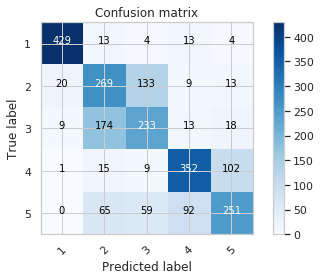

In [41]:
conf_matrix, clf = svm(X, y)
plt.figure()
plot_confusion_matrix(conf_matrix, classes=['1', '2', '3', '4', '5'], title='Confusion matrix')
plt.show()

#### Curva de aprendizaje

<module 'matplotlib.pyplot' from '/opt/miniconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

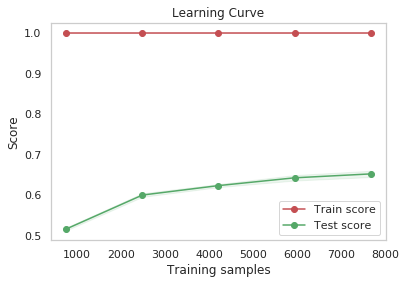

In [43]:
plot_learning_curve(clf, "Learning Curve", X, y)

Las siguientes imágenes muestran los resultados de SVM con 5000 datos y las siguientes características: 

    - Grado del polinomio 2:

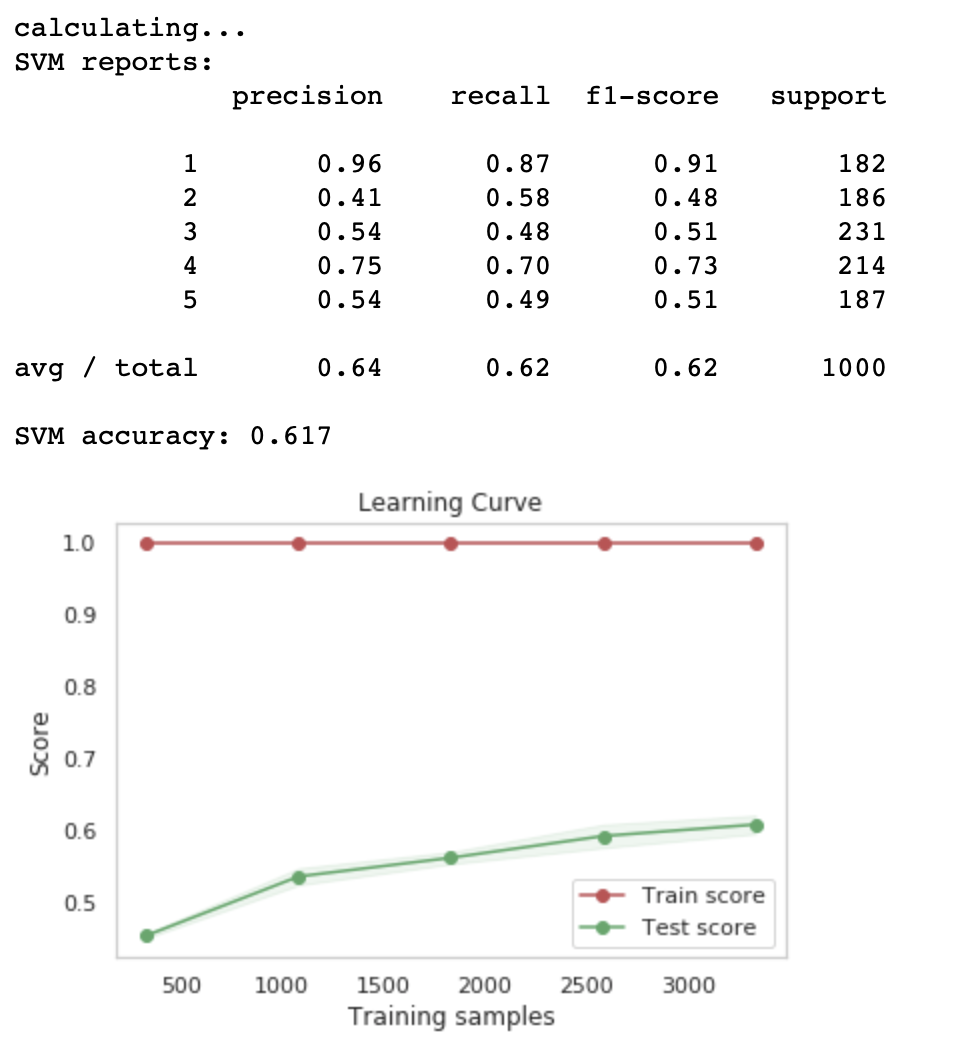

In [78]:
Image(filename='grado2_5milDatos.png',width = 500, height = 500)

    - Grado del polinomio 3:

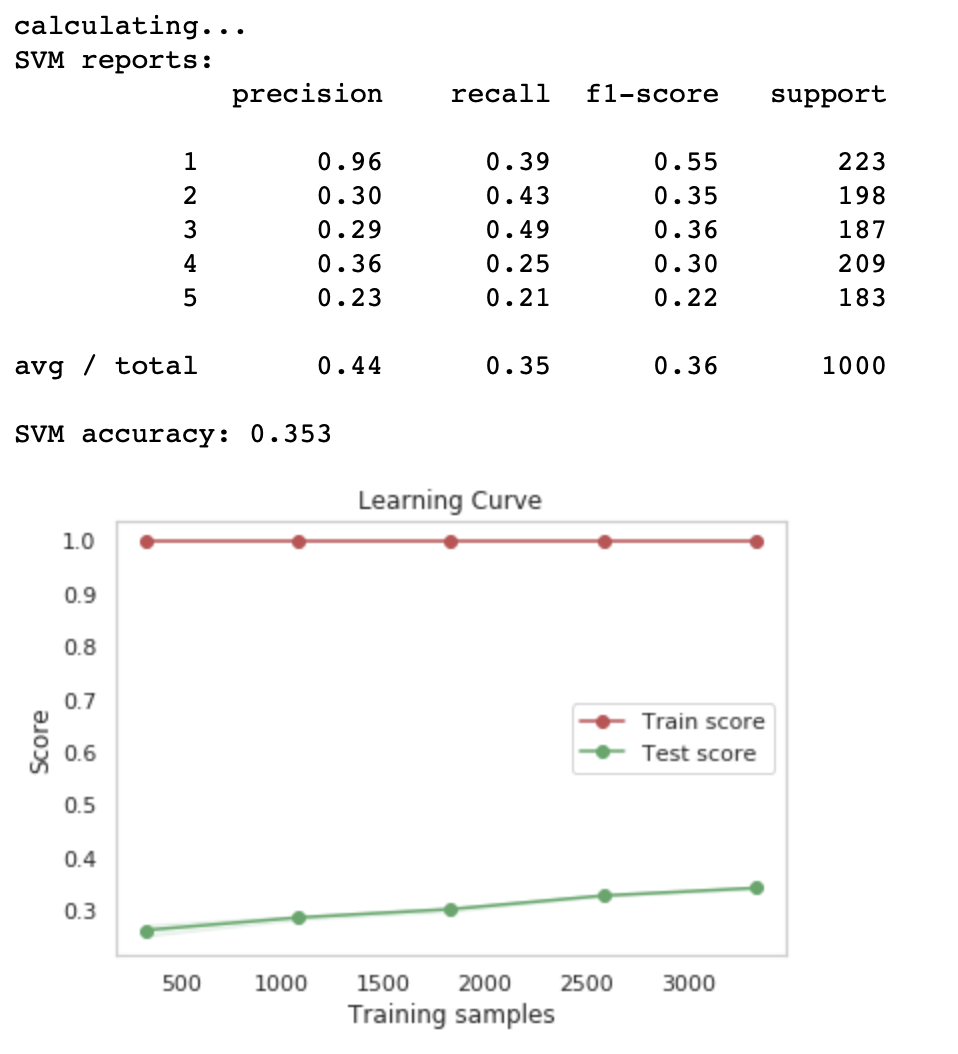

In [80]:
Image(filename='grado3_5milDatos.png',width = 500, height = 500)

    - Grado del polinomio 5:

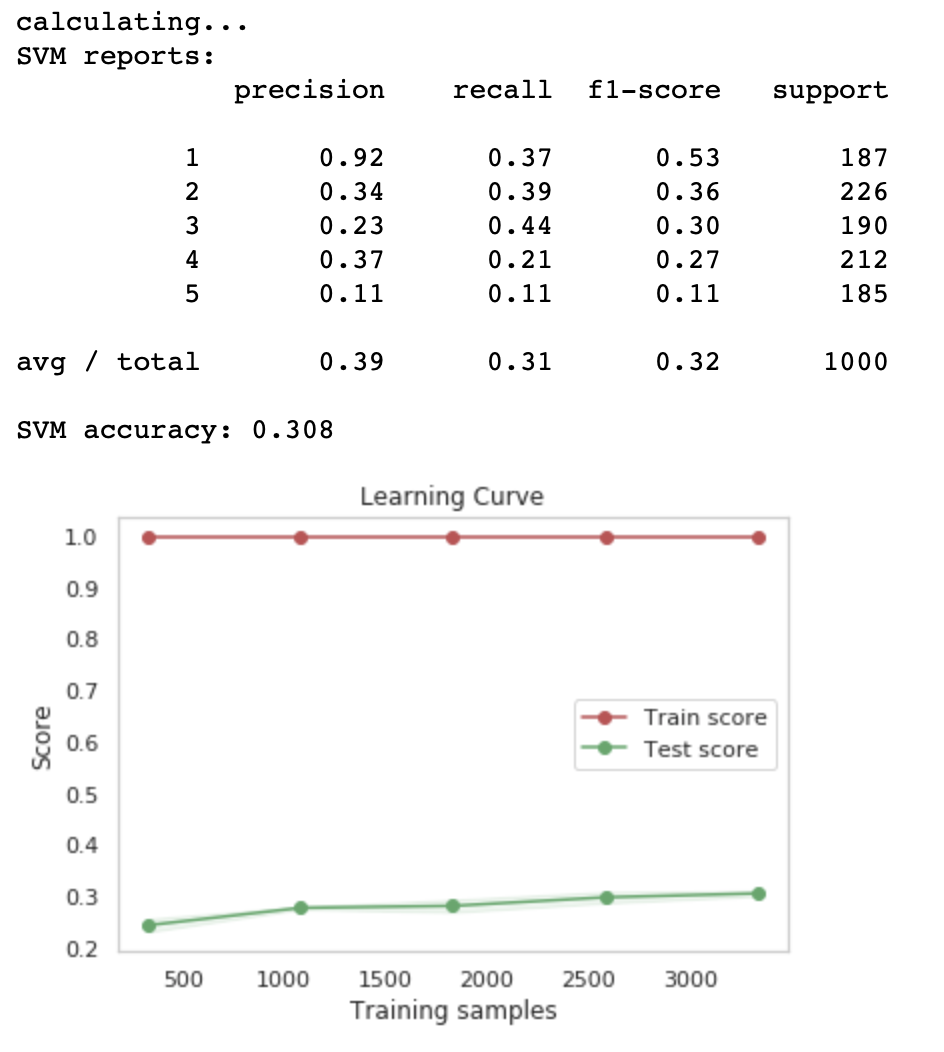

In [84]:
Image(filename='grado5_5milDatos.png',width = 500, height = 500)

In [85]:
#Random Forest
#A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 
#Random Forest fue un algoritmo que tuvo un muy buen desempeño y precisión clasificando.
#Se decidió implementarlo con una profundidad de 17 porque mostraba muy buen desempeño tanto en accuracy como en la curva
#de aprendizaje. Además, que se hizo el análisis de validación para varias profundidades y se calculó el accuracy para cada uno(ver gráfico)
#En la curva de aprendizaje puede apreciarse un overfitting pero este disminuye a medida que se aumentan los datos de train.

## Random Forest

#### Método usado para evaluar Random Forest con parámetros diferentes

In [87]:
def changeValuesRandomForest(X, y):
    print "Calculating for multiple depths..."
    plt.figure()
    max_depths = range(1, 25)
    predicts = np.array([cross_val_score(RandomForestClassifier(max_depth=i), X, y, cv=5) for i in max_depths])
    plt.plot(max_depths, predicts[:,0], "o-", color="green", label="Test")
    plt.grid()
    plt.xlabel("Random Forest max depth")
    plt.ylabel("Accuracy")

Un Random Forest es un meta estimador que se ajusta a una serie de clasificadores de árboles de decisión en varias submuestras del conjunto de datos y utiliza el promedio para mejorar la precisión predictiva y el ajuste excesivo del control.

Fue un algoritmo que tuvo un muy buen desempeño y precisión clasificando.

In [88]:
def randomForest(X, y):
    print "calculating..."
    Xtr, Xts, ytr, yts = train_test_split(X,y,test_size=0.3)
    clf = RandomForestClassifier(max_depth=17)
    clf.fit(Xtr, ytr)
    predicts = clf.predict(Xts)
    acc = clf.score(Xts, yts)
    print "Random Forest reports:\n", classification_report(yts, predicts)
    print "Random Forest accuracy:", acc
    return confusion_matrix(yts, predicts), clf

#### Matriz de confusión y reportes

calculating...
Random Forest reports:
             precision    recall  f1-score   support

          1       0.97      0.93      0.95       718
          2       0.92      0.95      0.93       693
          3       0.92      0.92      0.92       693
          4       0.94      0.95      0.95       676
          5       1.00      1.00      1.00       670

avg / total       0.95      0.95      0.95      3450

Random Forest accuracy: 0.9507246376811594


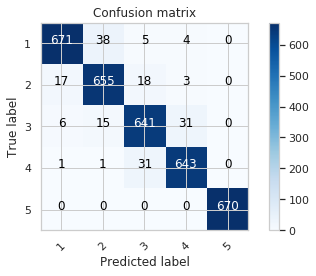

In [93]:
conf_matrix, clf = randomForest(X, y)
plt.figure()
plot_confusion_matrix(conf_matrix, classes=['1', '2', '3', '4', '5'], title='Confusion matrix')
plt.show()

#### Curva de aprendizaje

Se decidió implementarlo con una profundidad de 17 porque mostraba muy buen desempeño tanto en accuracy como en la curva de aprendizaje. Además, que se hizo el análisis de validación para varias profundidades y se calculó el accuracy para cada uno. En la curva de aprendizaje puede apreciarse un overfitting pero este disminuye a medida que se aumentan los datos de train.

<module 'matplotlib.pyplot' from '/opt/miniconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

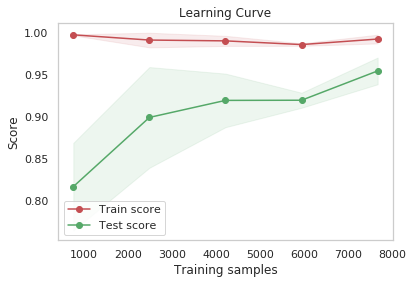

In [95]:
plot_learning_curve(clf, "Learning Curve", X, y)

#### Resultado del cambio de parámetros

Calculating for multiple depths...


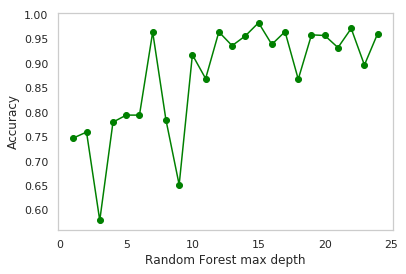

In [97]:
changeValuesRandomForest(X, y)
plt.show()

In [98]:
#Decision Tree
#The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.
#Decision Tree es un algoritmo que tuvo un resultado perfecto en la clasificación.
#Se decidió implementarlo con una profundidad de 4 porque mostraba muy buen desempeño tanto en accuracy como en la curva
#de aprendizaje. Además, que se hizo el análisis de validación para varias profundidades y se calculó el accuracy para cada uno(ver gráfico)
#En la curva de aprendizaje se puede apreciar que no hay overfitting y prácticamente no hay varianza alguna.
#El algoritmo se desempeña muy bien en esta tarea.

## Decision Tree

El objetivo es crear un modelo que predice el valor de una variable objetivo mediante el aprendizaje de reglas de decisión simples deducidas de las características de los datos.

#### Método usado para evaluar Decision Tree con parámetros diferentes

In [100]:
def changeValuesDecisionTree(X, y):
    print "Calculating for multiple depths..."
    plt.figure()
    max_depths = range(1, 25)
    predicts = np.array([cross_val_score(DecisionTreeClassifier(max_depth=i), X, y, cv=5) for i in max_depths])
    plt.plot(max_depths, predicts[:,0], "o-", color="green", label="Test")
    plt.grid()
    plt.xlabel("Decision tree max depth")
    plt.ylabel("Accuracy")

In [101]:
def decisionTree(X, y):
    print "calculating..."
    Xtr, Xts, ytr, yts = train_test_split(X,y,test_size=0.3)
    clf = DecisionTreeClassifier(max_depth=4);
    clf.fit(Xtr, ytr)
    predicts = clf.predict(Xts)
    acc = clf.score(Xts, yts)
    print "Decision tree reports:\n", classification_report(yts, predicts)
    print "Decision tree accuracy:", acc
    return confusion_matrix(yts, predicts), clf

#### Matriz de confusión y reportes
Decision Tree es un algoritmo que tuvo un resultado perfecto en la clasificación.

calculating...
Decision tree reports:
             precision    recall  f1-score   support

          1       1.00      1.00      1.00       689
          2       1.00      1.00      1.00       693
          3       1.00      1.00      1.00       680
          4       1.00      1.00      1.00       702
          5       1.00      1.00      1.00       686

avg / total       1.00      1.00      1.00      3450

Decision tree accuracy: 1.0


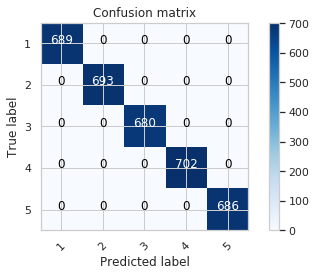

In [103]:
conf_matrix, clf = decisionTree(X, y)
plt.figure()
plot_confusion_matrix(conf_matrix, classes=['1', '2', '3', '4', '5'], title='Confusion matrix')
plt.show()

#### Curva de aprendizaje
Se decidió implementarlo con una profundidad de 4 porque mostraba muy buen desempeño tanto en accuracy como en la curva de aprendizaje. Además, que se hizo el análisis de validación para varias profundidades y se calculó el accuracy para cada uno. En la curva de aprendizaje se puede apreciar que no hay overfitting y prácticamente no hay varianza alguna. 

El algoritmo se desempeña muy bien en esta tarea.

<module 'matplotlib.pyplot' from '/opt/miniconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

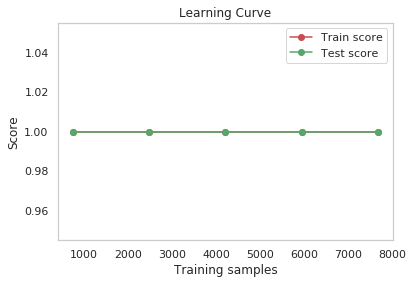

In [105]:
plot_learning_curve(clf, "Learning Curve", X, y)

#### Resultado del cambio de parámetros

Calculating for multiple depths...


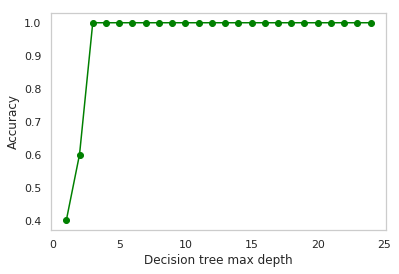

In [107]:
changeValuesDecisionTree(X, y)
plt.show()

In [108]:
#KNN
#Classifier implementing the k-nearest neighbors vote.
#Cabe destacar que se recomiendan vecinos impares para evitar un empate al momento de decidir la clase.
#Este algoritmo no tuvo muy buen desempeño en esta tarea. Además que el tiempo que toma para ejecutar también es considerablemente
#alto.
#Se decide implementarlo con 23 vecinos porque en la validación se encontró que era un número con el cual el overfitting 
#disminuia, sin embargo, se pierde accuracy.
#Si se aumenta el número de vecinos se reduce el overfitting pero se pierde accuracy(ver imagen)
#La curva de aprendizaje muestra un comportamiento creciente respecto al score en train y test a medida que aumentan los
#datos de train. No se aprecia un overfitting significante.

## KNN
Clasificador que implementa el voto de k vecinos mas cercanos.

Cabe destacar que se recomiendan vecinos impares para evitar un empate al momento de decidir la clase.

#### Método usado para evaluar KNN con parámetros diferentes

In [110]:
def changeValuesKNN(X, y):
    print "This might take several minutes, please be patience."
    print "Calculating for multiple neighbors..."
    plt.figure()
    num_neighbors = range(1, 25, 2)
    predicts = np.array([cross_val_score(KNeighborsClassifier(n_neighbors=i), X, y, cv=5) for i in num_neighbors])
    plt.plot(num_neighbors, predicts[:,0], "o-", color="green", label="Test")
    plt.grid()
    plt.xlabel("KNN neighbors")
    plt.ylabel("Accuracy")

In [111]:
def knn(X, y):
    print "calculating..."
    Xtr, Xts, ytr, yts = train_test_split(X,y,test_size=0.2)
    clf = KNeighborsClassifier(n_neighbors=23);
    clf.fit(Xtr, ytr)
    predicts = clf.predict(Xts)
    acc = clf.score(Xts, yts)
    print "KNN reports:\n", classification_report(yts, predicts)
    print "KNN accuracy:", acc
    return confusion_matrix(yts, predicts), clf

#### Matriz de confusión y reportes
Este algoritmo no tuvo muy buen desempeño en esta tarea. Además que el tiempo que toma para ejecutar también es considerablemente alto.

calculating...
KNN reports:
             precision    recall  f1-score   support

          1       0.99      0.61      0.76       462
          2       0.32      0.52      0.39       452
          3       0.31      0.69      0.43       465
          4       0.77      0.21      0.33       462
          5       0.16      0.05      0.07       459

avg / total       0.51      0.41      0.40      2300

KNN accuracy: 0.41391304347826086


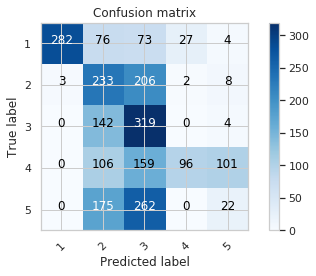

In [113]:
conf_matrix, clf = knn(X, y)
plt.figure()
plot_confusion_matrix(conf_matrix, classes=['1', '2', '3', '4', '5'], title='Confusion matrix')
plt.show()

#### Curva de aprendizaje
Se decide implementarlo con 23 vecinos porque en la validación se encontró que era un número con el cual el overfitting disminuia, sin embargo, se pierde accuracy.

Si se aumenta el número de vecinos se reduce el overfitting pero se pierde accuracy.

La curva de aprendizaje muestra un comportamiento creciente respecto al score en train y test a medida que aumentan los datos de train. No se aprecia un overfitting significante.

<module 'matplotlib.pyplot' from '/opt/miniconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

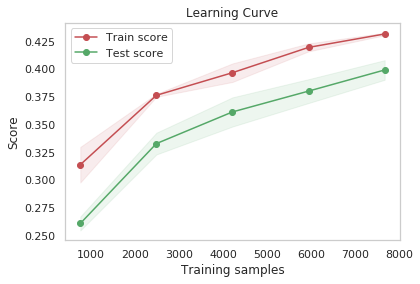

In [115]:
plot_learning_curve(clf, "Learning Curve", X, y)

#### Resultado del cambio de parámetros

This might take several minutes, please be patience.
Calculating for multiple neighbors...


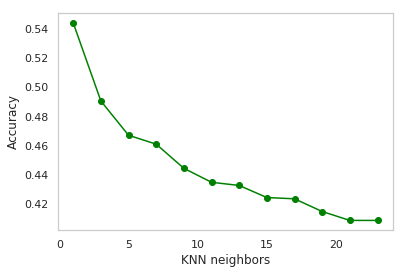

In [117]:
changeValuesKNN(X, y)
plt.show()

La siguiente imagen muestra los resultados de la ejecución de KNN con n_neighbors = 1

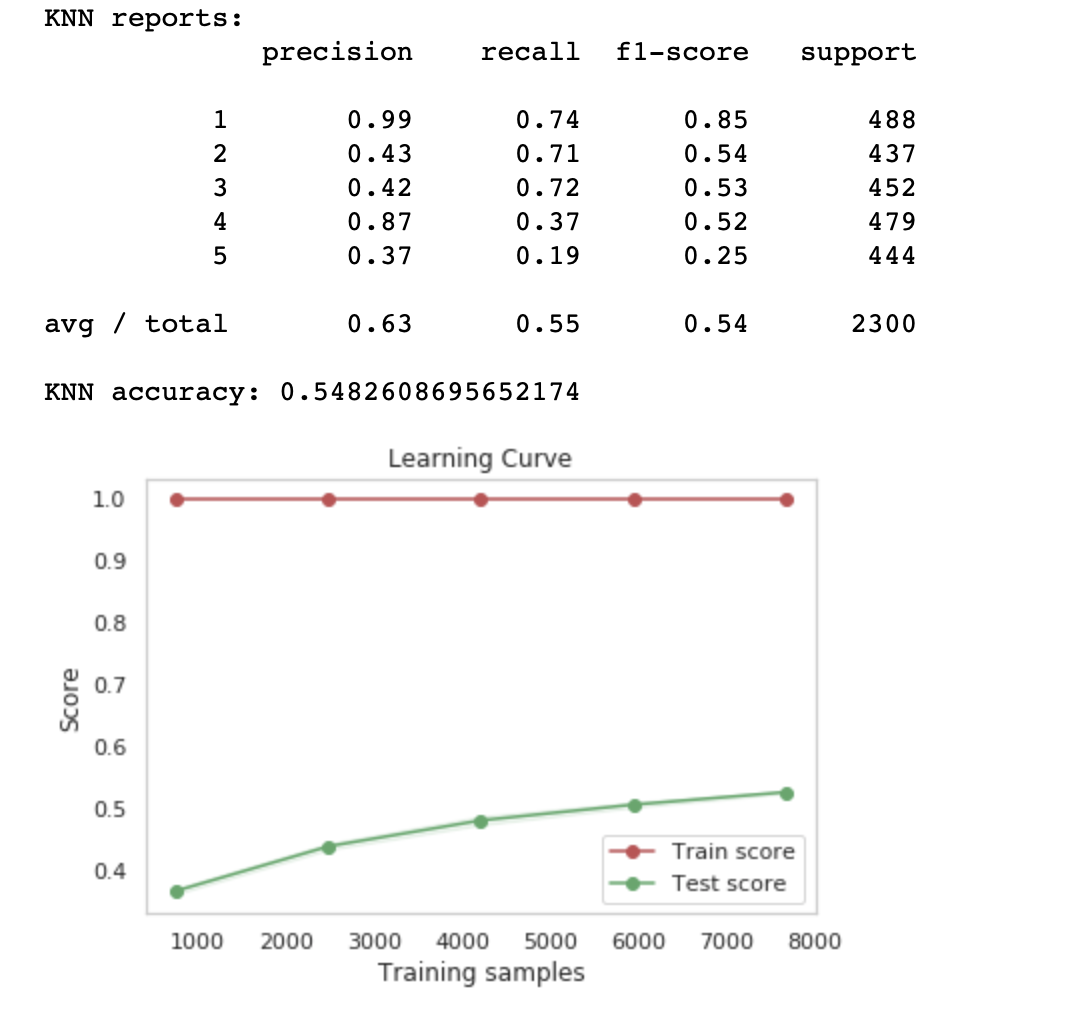

In [121]:
Image(filename='KNN con 1 vecino.png',width = 500, height = 500)